## Import necessary libraries

In [1]:
import torch
import os
import pandas as pd
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,random_split

import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
import kagglehub

path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.63k/4.63k [00:00<00:00, 7.18MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


In [3]:
os.chdir(path)
!ls

Housing.csv


## Loading the cs file into pandas dataframe

In [4]:
file_path = os.path.join(path, "Housing.csv")

df = pd.read_csv(file_path)

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
print("Total number of columns ::", len(df.columns))
for col in df.columns:
    print(col)

Total number of columns :: 13
price
area
bedrooms
bathrooms
stories
mainroad
guestroom
basement
hotwaterheating
airconditioning
parking
prefarea
furnishingstatus


In [7]:
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

print("Number of numerical columns ::",len(numerical_cols))
print(numerical_cols)
print("Number of categorical columns :: ",len(categorical_cols))
print(  categorical_cols)

Number of numerical columns :: 6
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Number of categorical columns ::  7
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


## Inspecting null values

In [8]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


## Inspecting the duplicate values

In [9]:
df.duplicated().sum()

np.int64(0)

## Inspecting numerical columns

In [10]:
for col in numerical_cols:
  print("Unique elements of ::",col)
  print(df[col].unique())

Unique elements of :: price
[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  493

From above it is clear that among the 6 numerical features there can be divisions among discrete and continuous features

1. Discrete
  - bedrooms
  - bathrooms
  - stories
  - parking

2. Continuous
  - area
  - price

In [11]:
discrete_cols = ['bedrooms', 'bathrooms', 'stories', 'parking']
continuous_cols = ['area', 'price']

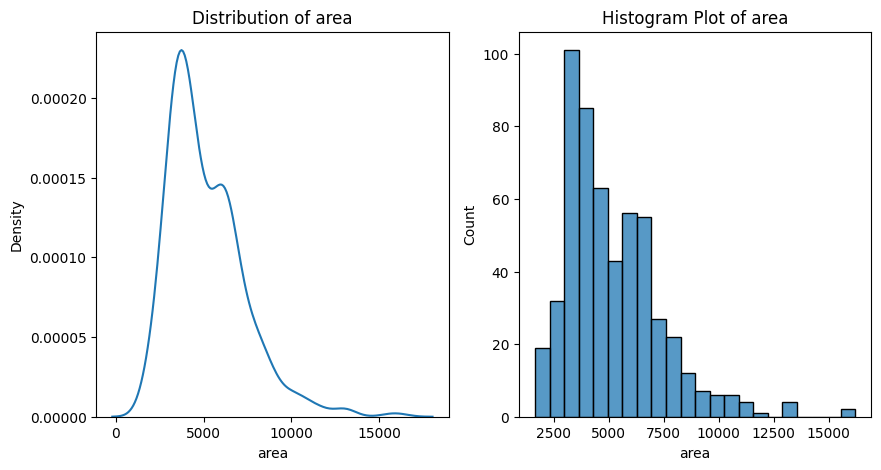

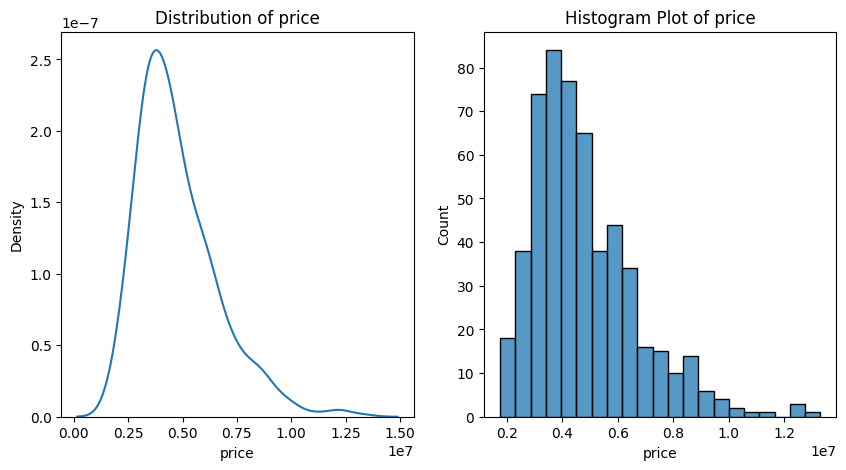

In [12]:
for col in continuous_cols:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title(f"Distribution of {col}")
  sns.kdeplot(data=df, x=col)
  plt.subplot(1,2,2)
  plt.title(f"Histogram Plot of {col}")
  sns.histplot(data=df, x=col)
  plt.show()

The continuous columns are skewed

### Outlier analysis in continuous columns

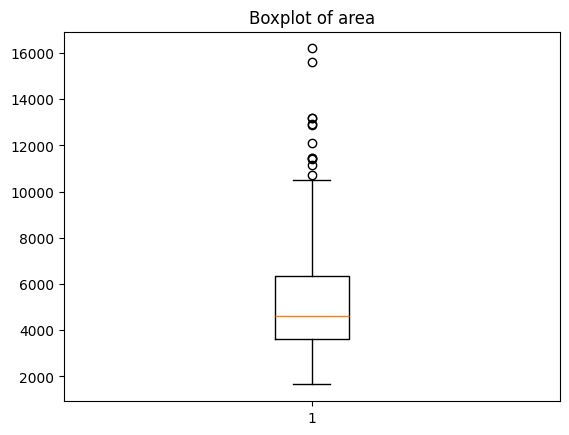

Number of outliers in area :: 12


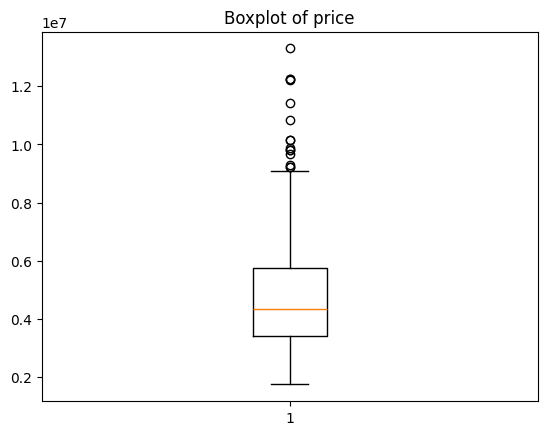

Number of outliers in price :: 15


In [13]:
for col in continuous_cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  plt.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()
  print(f"Number of outliers in {col} ::",len(outliers))

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64


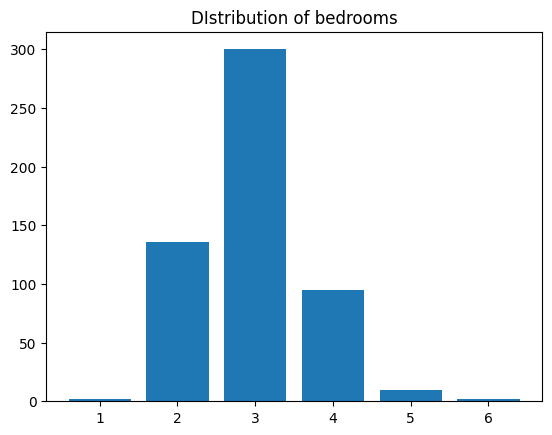

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


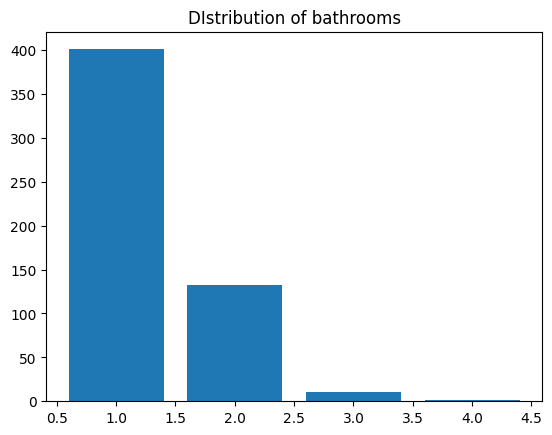

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64


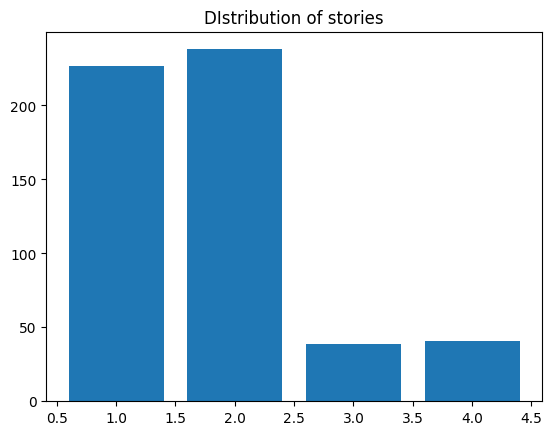

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64


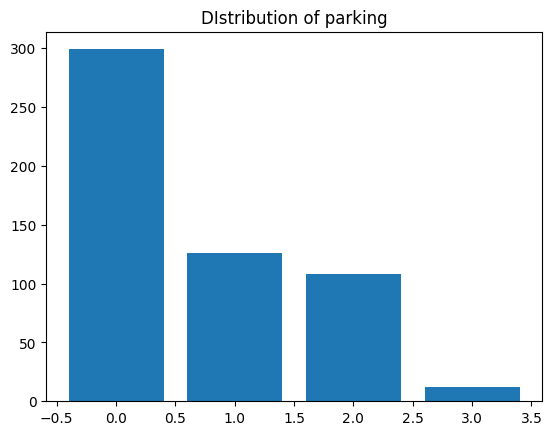

In [14]:
for col in discrete_cols:
  print(df[col].value_counts())
  plt.title(f"DIstribution of {col}")
  plt.bar(df[col].value_counts().index,df[col].value_counts().values)
  plt.show()

## EDA of categorical columns

In [15]:
for col in categorical_cols:
  print("Unique values in ", col)
  print(df[col].unique())

Unique values in  mainroad
['yes' 'no']
Unique values in  guestroom
['no' 'yes']
Unique values in  basement
['no' 'yes']
Unique values in  hotwaterheating
['no' 'yes']
Unique values in  airconditioning
['yes' 'no']
Unique values in  prefarea
['yes' 'no']
Unique values in  furnishingstatus
['furnished' 'semi-furnished' 'unfurnished']


Only furnishingstatus is ordinal and the rest of others are nominal features

mainroad
yes    468
no      77
Name: count, dtype: int64


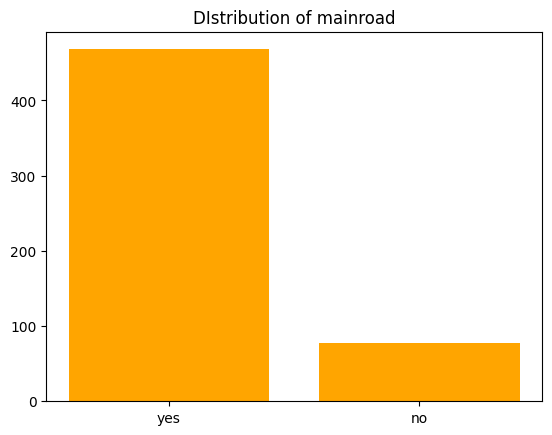

guestroom
no     448
yes     97
Name: count, dtype: int64


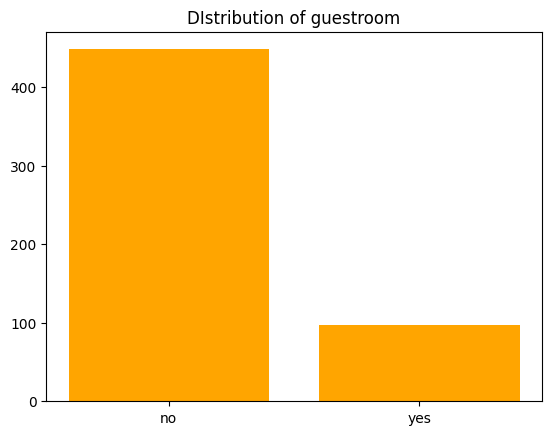

basement
no     354
yes    191
Name: count, dtype: int64


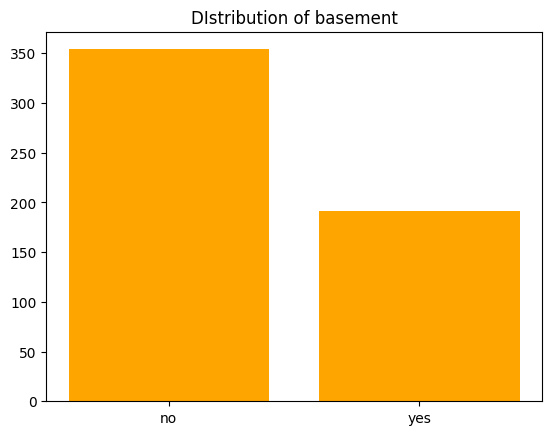

hotwaterheating
no     520
yes     25
Name: count, dtype: int64


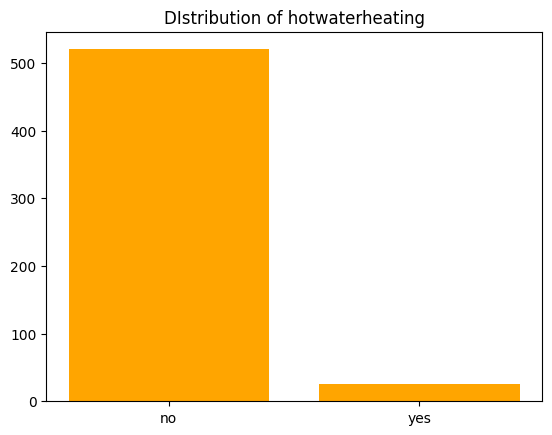

airconditioning
no     373
yes    172
Name: count, dtype: int64


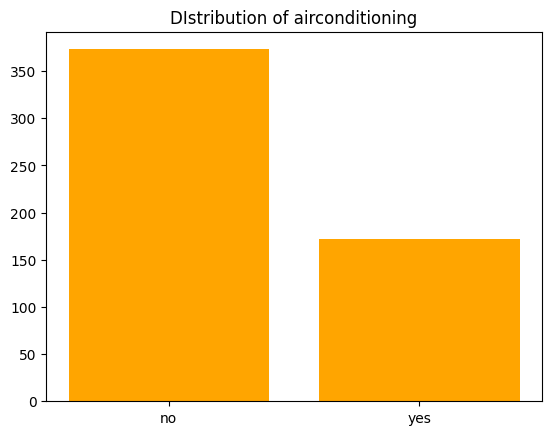

prefarea
no     417
yes    128
Name: count, dtype: int64


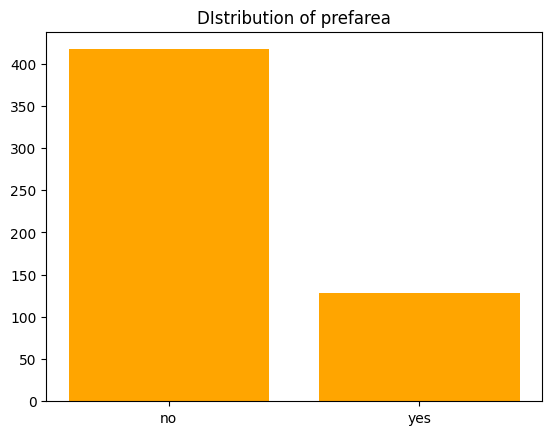

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


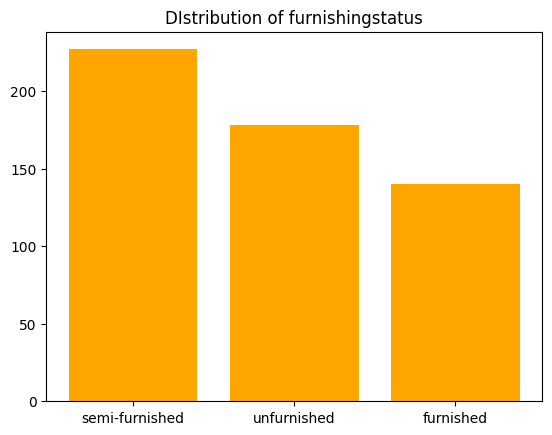

In [16]:
for col in categorical_cols:
  print(df[col].value_counts())
  plt.title(f"DIstribution of {col}")
  plt.bar(df[col].value_counts().index,df[col].value_counts().values, color = "orange")
  plt.show()

### Log transformations of the both skewed continuous columns

In [17]:
df['log_price'] = torch.log(torch.tensor(df['price'].values))
df['log_area'] = torch.log(torch.tensor(df['area'].values))

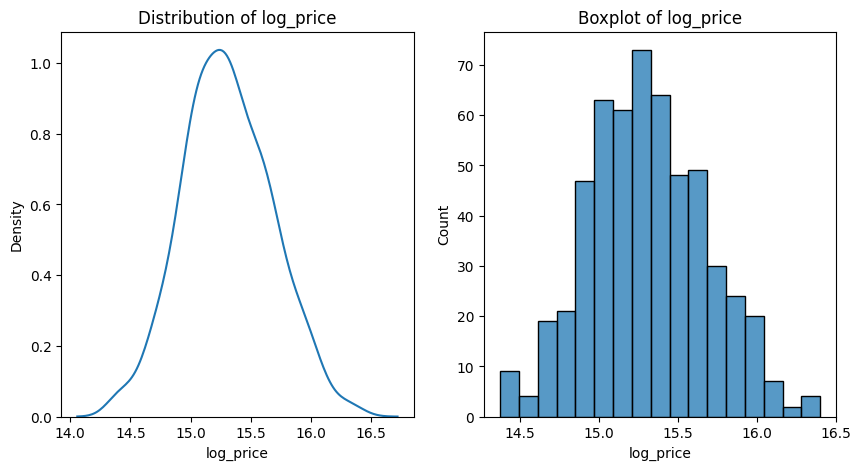

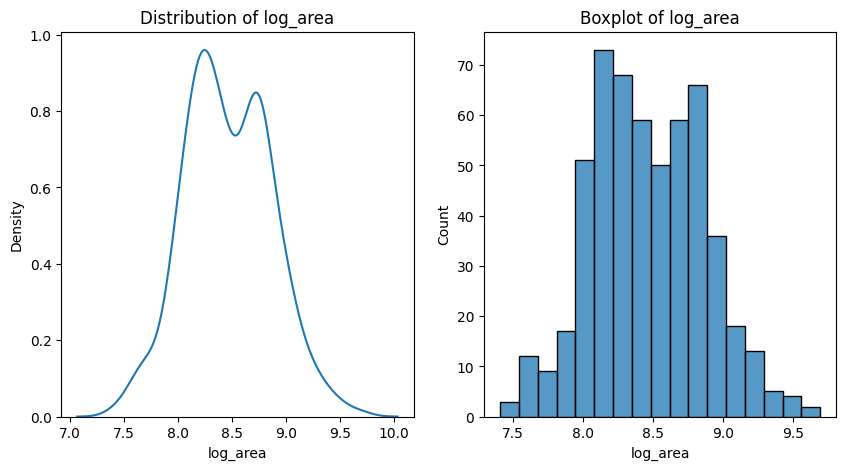

In [18]:
transformed_cols = ['log_price', 'log_area']
for col in transformed_cols:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title(f"Distribution of {col}")
  sns.kdeplot(data=df, x=col)
  plt.subplot(1,2,2)
  plt.title(f"Boxplot of {col}")
  sns.histplot(data=df, x=col)
  plt.show()

This looks way better than the previous skewed distribution

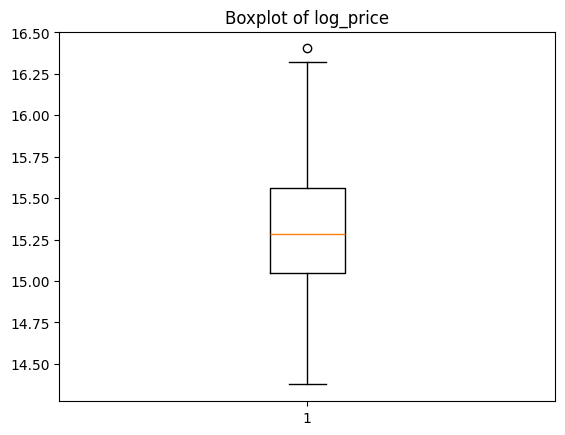

Number of outliers in log_price :: 1


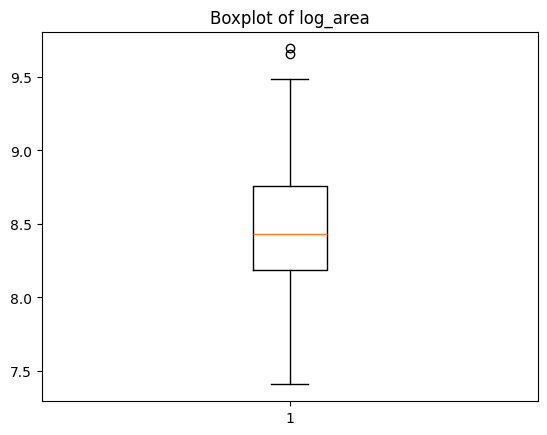

Number of outliers in log_area :: 2


In [19]:
for col in transformed_cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  plt.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()
  print(f"Number of outliers in {col} ::",len(outliers))

### Encoding the categorical columns

In [20]:
df.shape

(545, 15)

In [21]:
categorical_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [22]:
ordinal_col = ['furnishingstatus']
del categorical_cols[6]

#### Ordinal Encoding

In [23]:
mapping = {'unfurnished': 0,
           'semi-furnished' : 1,
           'furnished' : 2}
df['furnishingstatus'] = df['furnishingstatus'].map(mapping)

In [24]:
df['furnishingstatus'].value_counts()

,count
furnishingstatus,
1,227
0,178
2,140


#### Nominal encoding

In [25]:
nominal_mapping = {
    'yes': 1,
    'no' : 0
}
for col in categorical_cols:
  df[col] = df[col].map(nominal_mapping)

In [26]:
for i,col in enumerate(df.columns):
  print(i+1 , "::", col)

1 :: price
2 :: area
3 :: bedrooms
4 :: bathrooms
5 :: stories
6 :: mainroad
7 :: guestroom
8 :: basement
9 :: hotwaterheating
10 :: airconditioning
11 :: parking
12 :: prefarea
13 :: furnishingstatus
14 :: log_price
15 :: log_area


In [27]:
df['area_bedrooms'] = df['log_area'] * df['bedrooms']
df['area_bathrooms'] = df['log_area'] * df['bathrooms']
df['bed_bath'] = df['bedrooms'] * df['bathrooms']

amenity_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]
df['amenities_count'] = df[amenity_cols].sum(axis=1)

df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# Dropping
df.drop(columns=amenity_cols, inplace=True)
df.drop(columns=['area', 'price'], inplace=True)

In [28]:
for i,col in enumerate(df.columns):
  print(i+1 , "::", col)

1 :: bedrooms
2 :: bathrooms
3 :: stories
4 :: parking
5 :: furnishingstatus
6 :: log_price
7 :: log_area
8 :: area_bedrooms
9 :: area_bathrooms
10 :: bed_bath
11 :: amenities_count
12 :: total_rooms


<Axes: >

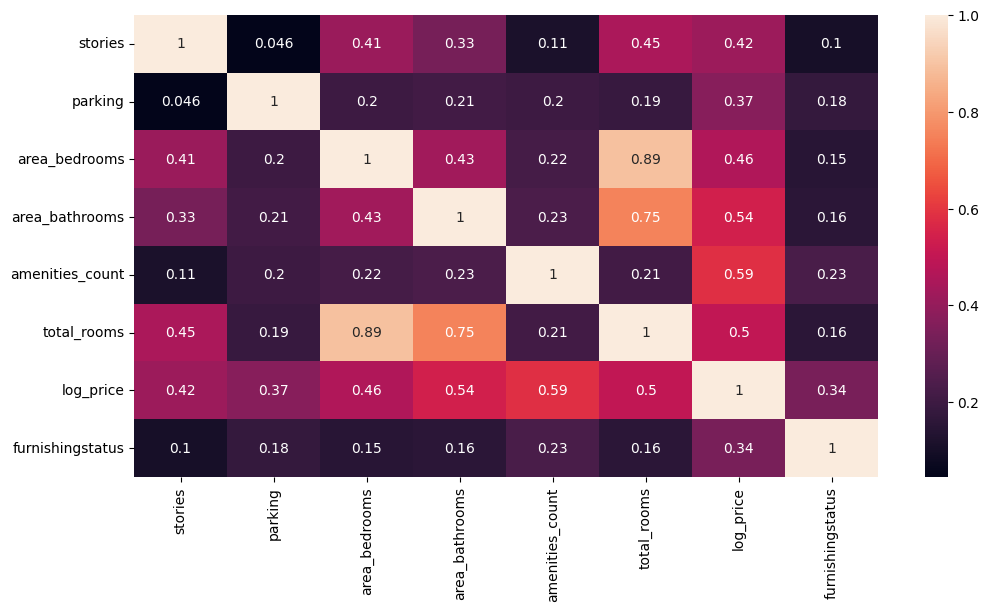

In [80]:
cols = ['stories', 'parking', 'area_bedrooms', 'area_bathrooms', 'amenities_count', 'total_rooms','log_price','furnishingstatus']
plt.figure(figsize=(12,6))
sns.heatmap(df[cols].corr(), annot=True)

In [30]:
feature_df_log_transformed = df.drop(columns = ['log_price'])
feature_cols = feature_df_log_transformed.columns
target = df['log_price']

print(feature_df_log_transformed.shape)
print(target.shape)

(545, 11)
(545,)


### Creating a Custom Dataset class

In [31]:
class HousingDataset(Dataset):
    def __init__(self, feature_tensor, target_tensor, feature_names):
        self.X = feature_tensor
        self.y = target_tensor
        self.feature_names = feature_names

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return len(self.X)

    def get_feature_names(self):
        return self.feature_names

In [32]:
housing_data = HousingDataset(torch.tensor(feature_df_log_transformed.values), torch.tensor(target.values), feature_cols)

In [33]:
housing_data.get_feature_names()

Index(['bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus',
       'log_area', 'area_bedrooms', 'area_bathrooms', 'bed_bath',
       'amenities_count', 'total_rooms'],
      dtype='object')

In [34]:
print(housing_data.X.shape)
print(housing_data.y.shape)

torch.Size([545, 11])
torch.Size([545])


545 data samples, 12 features

### Train Test Splitting

In [35]:
train_size = int(0.8 * (len(housing_data)))
test_size = len(housing_data) - train_size

print(train_size, test_size)

train_dataset, test_dataset = random_split(housing_data, [train_size, test_size])

print(housing_data.get_feature_names())

436 109
Index(['bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus',
       'log_area', 'area_bedrooms', 'area_bathrooms', 'bed_bath',
       'amenities_count', 'total_rooms'],
      dtype='object')


### Creating dataloaders for trainset and testset

In [36]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

### Normalization

In [37]:
feature_names = housing_data.get_feature_names()

In [38]:
features_to_normalize = ['log_area', 'area_bedrooms', 'area_bathrooms','bed_bath', 'stories', 'parking','bedrooms','bathrooms']
feature_stats = {}

for feature in features_to_normalize:
    index = feature_names.get_loc(feature)
    values = []
    for X_batch, _ in train_loader:
        values.append(X_batch[:, index].detach())
    values = torch.cat(values, dim=0)

    mean = values.mean()
    std = values.std()
    feature_stats[feature] = {'mean': mean, 'std': std}

    print(f"{feature} Mean :: {mean.item():.4f}")
    print(f"{feature} Std Dev :: {std.item():.4f}")
    print()

def normalize_features(X, feature_stats):
    for feature, stats in feature_stats.items():
        index = feature_names.get_loc(feature)
        X[:, index] = (X[:, index] - stats['mean']) / stats['std']
    return X

log_area Mean :: 8.4766
log_area Std Dev :: 0.3983

area_bedrooms Mean :: 25.1412
area_bedrooms Std Dev :: 6.7032

area_bathrooms Mean :: 10.9455
area_bathrooms Std Dev :: 4.4797

bed_bath Mean :: 3.9518
bed_bath Std Dev :: 2.2904

stories Mean :: 1.7867
stories Std Dev :: 0.8646

parking Mean :: 0.6858
parking Std Dev :: 0.8656

bedrooms Mean :: 2.9610
bedrooms Std Dev :: 0.7586

bathrooms Mean :: 1.2867
bathrooms Std Dev :: 0.5055



In [40]:
for x,y in train_loader:
  print(x)
  print(x.shape)
  print(y)
  print(y.shape)
  break

tensor([[ 2.0000,  2.0000,  1.0000,  0.0000,  1.0000,  8.3187, 16.6375, 16.6375,
          4.0000,  3.0000,  4.0000],
        [ 4.0000,  2.0000,  2.0000,  2.0000,  2.0000,  9.4001, 37.6005, 18.8003,
          8.0000,  2.0000,  6.0000],
        [ 3.0000,  2.0000,  2.0000,  2.0000,  1.0000,  8.2025, 24.6074, 16.4050,
          6.0000,  1.0000,  5.0000],
        [ 5.0000,  1.0000,  2.0000,  0.0000,  2.0000,  8.5942, 42.9708,  8.5942,
          5.0000,  5.0000,  6.0000],
        [ 2.0000,  1.0000,  1.0000,  0.0000,  1.0000,  8.2295, 16.4590,  8.2295,
          2.0000,  3.0000,  3.0000],
        [ 3.0000,  1.0000,  2.0000,  1.0000,  1.0000,  8.7765, 26.3294,  8.7765,
          3.0000,  1.0000,  4.0000],
        [ 3.0000,  1.0000,  4.0000,  2.0000,  0.0000,  8.6995, 26.0985,  8.6995,
          3.0000,  3.0000,  4.0000],
        [ 3.0000,  2.0000,  2.0000,  2.0000,  1.0000,  8.0646, 24.1939, 16.1293,
          6.0000,  1.0000,  5.0000],
        [ 3.0000,  1.0000,  1.0000,  2.0000,  1.0000,  8

- Input tensor => (N,d)
- Output tesnor => N or (N,1)

- N = batch size

## Linear Regression Model

In [41]:
torch.manual_seed(42)

**Random Initialization of weight and bias**

In [42]:
def get_initialized_w_b():
  W = torch.randn((11,1), dtype = torch.float32, requires_grad = False)
  b = torch.tensor([ 1.], dtype = torch.float32, requires_grad = False)
  return W,b

W,b = get_initialized_w_b()
print("Shape of W :: ", W.shape)
print("Shape of b :: ",b.shape)

Shape of W ::  torch.Size([11, 1])
Shape of b ::  torch.Size([1])


**Defining the MSE loss function**

In [43]:
def mse(y,y_hat):
  return 1/2 * ((y_hat - y)**2).mean()

In [44]:
def mse_grad(X,y,y_hat):
  with torch.no_grad():
    dL_dL = 1
    dL_dy_hat = (y_hat - y)/X.shape[0]
    dL_dW = X.T.type(torch.float32) @ dL_dy_hat
    dL_db = dL_dy_hat.sum(dim = 0)
    return dL_dL, dL_dy_hat, dL_dW, dL_db

**Building the model**

In [45]:
def model(w,b,X):
  X = X.type(torch.float32)
  y = X @ w + b
  return y

In [46]:
from sklearn.metrics import r2_score

In [81]:
def mae(y, y_hat):
    return torch.mean(torch.abs(y - y_hat))

def rmse(y, y_hat):
    return torch.sqrt(torch.mean((y - y_hat) ** 2))

def r2_scoree(y, y_hat):
    ssr = ((y - y_hat) ** 2).sum()
    sst = ((y - y.mean()) ** 2).sum()
    return 1 - ssr / sst

In [82]:
def train_validate_model(lr, epochs, train_loader,test_loader, loss_fn, loss_fn_grad):
    torch.manual_seed(42)
    W, b = get_initialized_w_b()

    train_loss_list,test_loss_list = [], []
    train_mae_list, test_mae_list = [], []
    train_rmse_list,test_rmse_list = [], []
    train_r2_list, test_r2_list = [], []

    # TRAINING LOOP
    for epoch in range(epochs):
        for X_batch, y_batch in train_loader:
            X_batch = normalize_features(X_batch, feature_stats)
            y_batch = y_batch.view(-1, 1)

            pred = model(W, b, X_batch)
            train_loss = loss_fn(y_batch, pred)
            train_mae  = mae(y_batch, pred)
            train_rmse = rmse(y_batch, pred)
            train_r2   = r2_scoree(y_batch, pred)

            # Backpropagation
            _, dL_dy_hat, dL_dW, dL_db = loss_fn_grad(X_batch, y_batch, pred)
            W = W - lr * dL_dW
            b = b - lr * dL_db

        if epoch % 200 == 0:
            train_loss_list.append(train_loss.item())
            train_mae_list.append(train_mae.item())
            train_rmse_list.append(train_rmse.item())
            train_r2_list.append(train_r2.item())


            print(f"Epoch {epoch}")
            print(f"  Train => L={train_loss:.4f}, MAE={train_mae:.4f}, RMSE={train_rmse:.4f}")

    # TESTING
    test_loss_total = test_mae_total = test_rmse_total = test_r2_total = 0.0
    test_batches = 0
    all_preds, all_targets = [], []

    for X_batch, y_batch in test_loader:
        X_batch = normalize_features(X_batch, feature_stats)
        y_batch = y_batch.view(-1, 1)

        pred = model(W, b, X_batch)
        test_loss = loss_fn(y_batch, pred)
        test_mae  = mae(y_batch, pred)
        test_rmse = rmse(y_batch, pred)

        all_preds.append(pred)
        all_targets.append(y_batch)

        test_loss_total += test_loss.item()
        test_mae_total  += test_mae.item()
        test_rmse_total += test_rmse.item()
        test_batches += 1

    # Final r2 on testing set
    all_preds   = torch.cat(all_preds, dim=0)
    all_targets = torch.cat(all_targets, dim=0)
    test_r2 = r2_scoree(all_targets, all_preds)

    avg_test_loss = test_loss_total / test_batches
    avg_test_mae  = test_mae_total  / test_batches
    avg_test_rmse = test_rmse_total / test_batches

    test_loss_list.append(avg_test_loss)
    test_mae_list.append(avg_test_mae)
    test_rmse_list.append(avg_test_rmse)
    test_r2_list.append(test_r2.item())

    print(f"Final Test => L={avg_test_loss:.4f}, MAE={avg_test_mae:.4f}, RMSE={avg_test_rmse:.4f}, R²={test_r2:.4f}")
    return train_loss_list,test_loss_list,W,b,all_preds,all_targets

In [77]:
def plot_predictions(all_targets, all_preds):
    all_targets = all_targets.detach().numpy().flatten()
    all_preds = all_preds.detach().numpy().flatten()

    plt.figure(figsize=(8, 6))
    plt.scatter(all_targets, all_preds, alpha=0.7, color='blue', edgecolor='k')
    plt.plot([all_targets.min(), all_targets.max()],
             [all_targets.min(), all_targets.max()],
             color='red', lw=2, linestyle='--', label='Prediction Line')

    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted House Prices')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [78]:
def plot_train_loss(train_loss):
    plt.figure(figsize=(8, 4))
    plt.plot(train_loss, label='Training Loss', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title('Training Loss Curve')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [73]:
train_loss, _, W_mse,b_mse,preds_mse,targets_mse=train_validate_model(0.0025, 5000, train_loader, test_loader, mse, mse_grad)

Epoch 0
  Train => L=20.3959, MAE=5.9683, RMSE=6.3868
Epoch 200
  Train => L=0.0106, MAE=0.1002, RMSE=0.1458
Epoch 400
  Train => L=0.0123, MAE=0.1414, RMSE=0.1567
Epoch 600
  Train => L=0.0060, MAE=0.1091, RMSE=0.1099
Epoch 800
  Train => L=0.0159, MAE=0.1490, RMSE=0.1783
Epoch 1000
  Train => L=0.0131, MAE=0.1392, RMSE=0.1616
Epoch 1200
  Train => L=0.0226, MAE=0.1790, RMSE=0.2128
Epoch 1400
  Train => L=0.0125, MAE=0.1238, RMSE=0.1581
Epoch 1600
  Train => L=0.0168, MAE=0.1709, RMSE=0.1831
Epoch 1800
  Train => L=0.0565, MAE=0.2892, RMSE=0.3362
Epoch 2000
  Train => L=0.0248, MAE=0.2191, RMSE=0.2226
Epoch 2200
  Train => L=0.0045, MAE=0.0895, RMSE=0.0945
Epoch 2400
  Train => L=0.0154, MAE=0.1542, RMSE=0.1752
Epoch 2600
  Train => L=0.0116, MAE=0.1373, RMSE=0.1526
Epoch 2800
  Train => L=0.0073, MAE=0.1148, RMSE=0.1210
Epoch 3000
  Train => L=0.0053, MAE=0.0882, RMSE=0.1033
Epoch 3200
  Train => L=0.0236, MAE=0.1391, RMSE=0.2171
Epoch 3400
  Train => L=0.0215, MAE=0.1951, RMSE=0.207

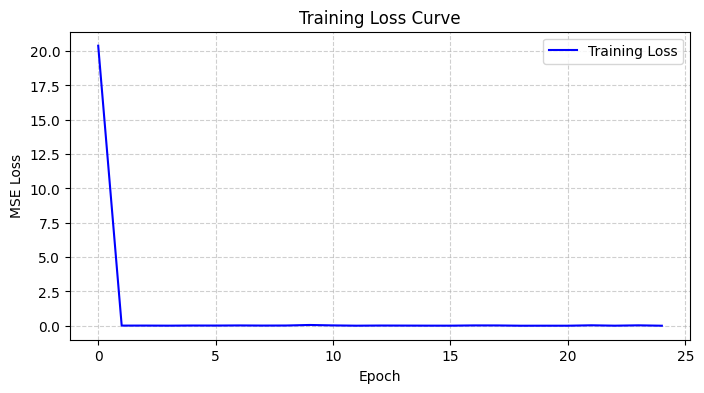

In [74]:
plot_train_loss(train_loss)

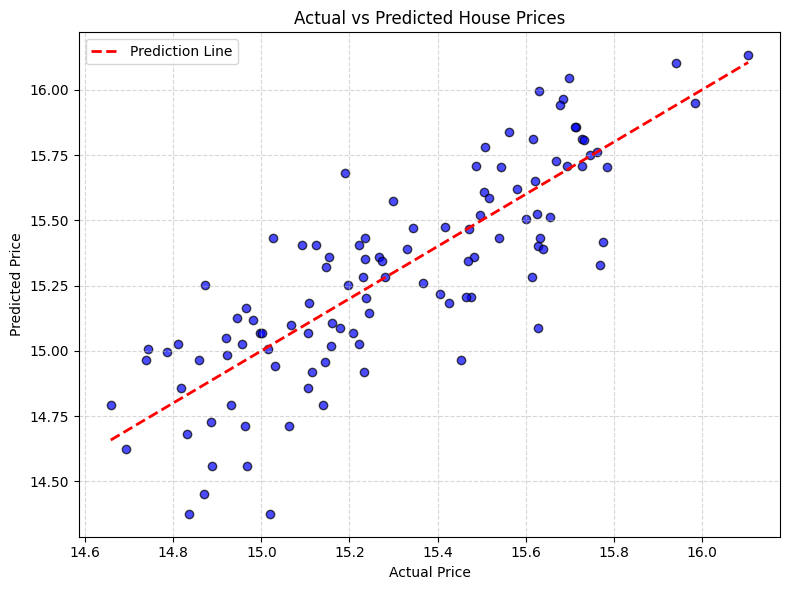

In [75]:
plot_predictions(preds_mse,targets_mse)

In [76]:
print(W_mse,b_mse)

tensor([[-2.2951],
        [-0.8613],
        [ 0.0864],
        [ 0.0411],
        [ 0.0587],
        [ 0.1925],
        [-0.0045],
        [-0.6692],
        [ 0.0792],
        [ 0.1082],
        [ 3.0285]]) tensor([2.1749])


## LR model with logcosh loss function

**Defining the logcosh function**

In [48]:
def log_cosh(y, y_hat):
  temp = torch.log(torch.cosh(y_hat - y))
  return temp.mean()

In [49]:
def logcosh_grad(X,y,y_hat):
  with torch.no_grad():
    dL_dL = 1
    dL_dy_hat = torch.tanh(y_hat - y)/X.shape[0]
    dL_dW = X.T.type(torch.float32) @ dL_dy_hat
    dL_db = dL_dy_hat.sum(dim = 0)
    return dL_dL, dL_dy_hat, dL_dW, dL_db

In [58]:
train_loss, _,W,b,preds,targets = train_validate_model(0.0025, 5200, train_loader, test_loader, log_cosh, logcosh_grad)

Epoch 0
  Train => L=10.1247, MAE=10.8178, RMSE=11.6337
Epoch 200
  Train => L=0.0109, MAE=0.1030, RMSE=0.1486
Epoch 400
  Train => L=0.0131, MAE=0.1498, RMSE=0.1624
Epoch 600
  Train => L=0.0065, MAE=0.1131, RMSE=0.1143
Epoch 800
  Train => L=0.0157, MAE=0.1502, RMSE=0.1778
Epoch 1000
  Train => L=0.0120, MAE=0.1334, RMSE=0.1552
Epoch 1200
  Train => L=0.0223, MAE=0.1796, RMSE=0.2134
Epoch 1400
  Train => L=0.0117, MAE=0.1165, RMSE=0.1542
Epoch 1600
  Train => L=0.0167, MAE=0.1715, RMSE=0.1835
Epoch 1800
  Train => L=0.0550, MAE=0.2882, RMSE=0.3371
Epoch 2000
  Train => L=0.0244, MAE=0.2185, RMSE=0.2221
Epoch 2200
  Train => L=0.0044, MAE=0.0892, RMSE=0.0942
Epoch 2400
  Train => L=0.0153, MAE=0.1552, RMSE=0.1758
Epoch 2600
  Train => L=0.0116, MAE=0.1373, RMSE=0.1528
Epoch 2800
  Train => L=0.0073, MAE=0.1147, RMSE=0.1208
Epoch 3000
  Train => L=0.0054, MAE=0.0884, RMSE=0.1044
Epoch 3200
  Train => L=0.0224, MAE=0.1371, RMSE=0.2148
Epoch 3400
  Train => L=0.0213, MAE=0.1952, RMSE=0.2

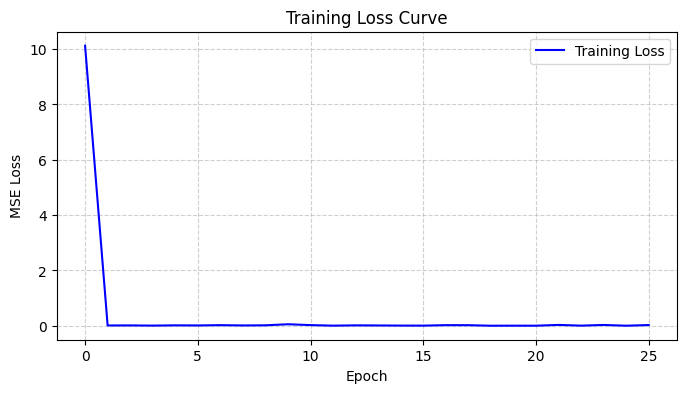

In [70]:
plot_train_loss(train_loss)

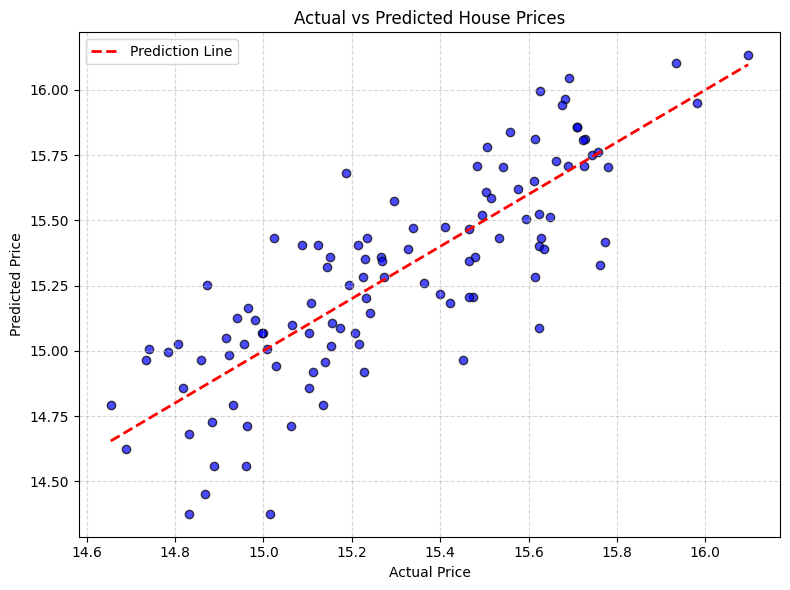

In [61]:
plot_predictions(preds,targets)

## LR with huber loss function

**Defining the loss function**

In [65]:
def huber_loss(y , y_hat, delta = 20):
    delta = torch.tensor(delta,dtype = torch.float32)
    error = torch.abs(y_hat - y)
    loss = torch.where(error <= delta, 0.5 * error**2, delta * (error - 0.5 * delta))
    return loss.mean()

In [66]:
def huber_loss_grad(X,y,y_hat,delta = 20):
  delta = torch.tensor(delta,dtype = torch.float32)
  error = torch.abs(y_hat - y)
  with torch.no_grad():
    dL_dL = 1
    dL_dy_hat = torch.where(error <= delta, (y_hat - y)/X.shape[0], torch.sign(delta * y_hat)/X.shape[0])
    dL_dW = X.T.type(torch.float32) @ dL_dy_hat
    dL_db = dL_dy_hat.sum(dim = 0)
    return dL_dL, dL_dy_hat, dL_dW, dL_db

In [67]:
train_loss_h, _,W,b,preds_h,targets_h = train_validate_model(0.0025, 5200, train_loader, test_loader, huber_loss, huber_loss_grad)

Epoch 0
  Train => L=20.3959, MAE=5.9683, RMSE=6.3868
Epoch 200
  Train => L=0.0106, MAE=0.1002, RMSE=0.1458
Epoch 400
  Train => L=0.0123, MAE=0.1414, RMSE=0.1567
Epoch 600
  Train => L=0.0060, MAE=0.1091, RMSE=0.1099
Epoch 800
  Train => L=0.0159, MAE=0.1490, RMSE=0.1783
Epoch 1000
  Train => L=0.0131, MAE=0.1392, RMSE=0.1616
Epoch 1200
  Train => L=0.0226, MAE=0.1790, RMSE=0.2128
Epoch 1400
  Train => L=0.0125, MAE=0.1238, RMSE=0.1581
Epoch 1600
  Train => L=0.0168, MAE=0.1709, RMSE=0.1831
Epoch 1800
  Train => L=0.0565, MAE=0.2892, RMSE=0.3362
Epoch 2000
  Train => L=0.0248, MAE=0.2191, RMSE=0.2226
Epoch 2200
  Train => L=0.0045, MAE=0.0895, RMSE=0.0945
Epoch 2400
  Train => L=0.0154, MAE=0.1542, RMSE=0.1752
Epoch 2600
  Train => L=0.0116, MAE=0.1373, RMSE=0.1526
Epoch 2800
  Train => L=0.0073, MAE=0.1148, RMSE=0.1210
Epoch 3000
  Train => L=0.0053, MAE=0.0882, RMSE=0.1033
Epoch 3200
  Train => L=0.0236, MAE=0.1391, RMSE=0.2171
Epoch 3400
  Train => L=0.0215, MAE=0.1951, RMSE=0.207

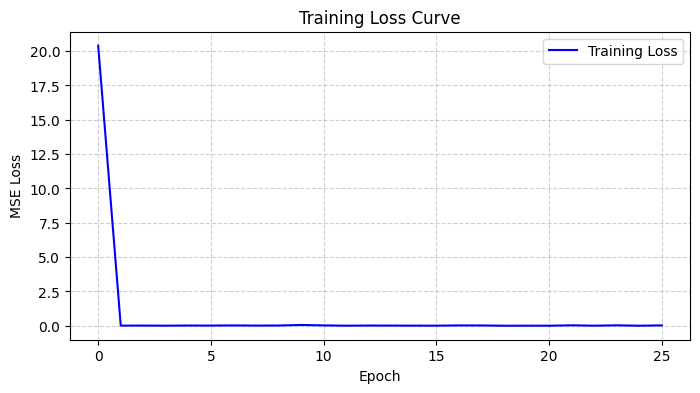

In [68]:
plot_train_loss(train_loss_h)

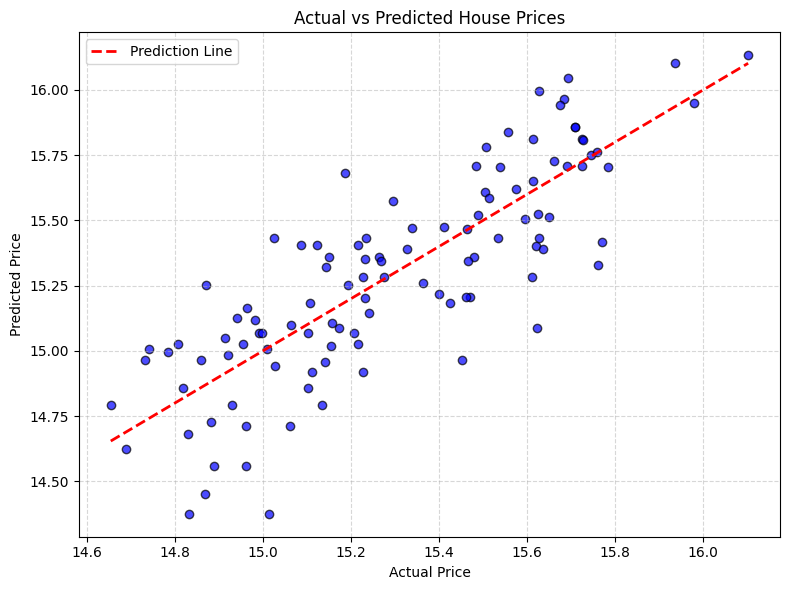

In [69]:
plot_predictions(preds_h,targets_h)